In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [7]:
np.random.seed(42)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


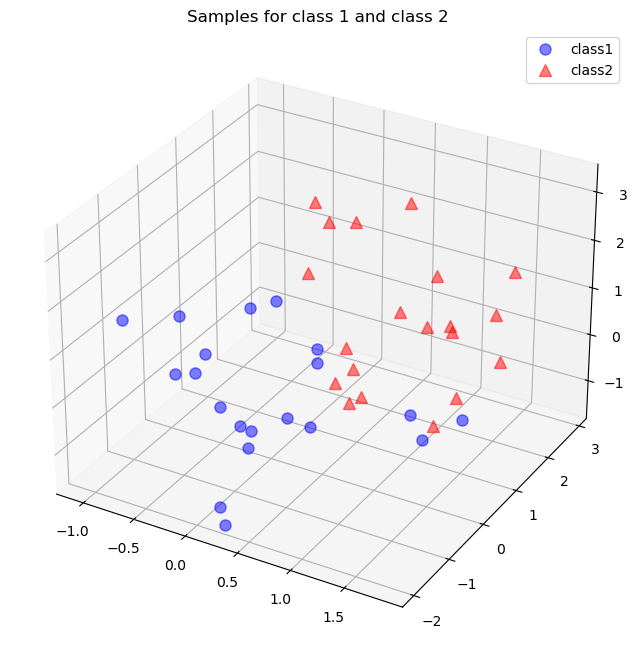

In [8]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

## Loading datasets

In [10]:
data = load_digits()

In [13]:
images = data.data
images.shape

(1797, 64)

In [14]:
labels = data.target
labels.shape

(1797,)

## Computing mean vector for 64 dimensions

In [25]:
mean_vector = np.mean(images, axis=0).reshape(-1,1)

In [27]:
mean_vector.shape

(64, 1)

## Computing Covariance matrix

In [28]:
cov_mat = np.cov(images.T)

In [29]:
cov_mat.shape

(64, 64)

## Computing Eigen values and corresponding eigen vectors

In [34]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [35]:
eig_val.shape, eig_vec.shape

((64,), (64, 64))

### Scree plot

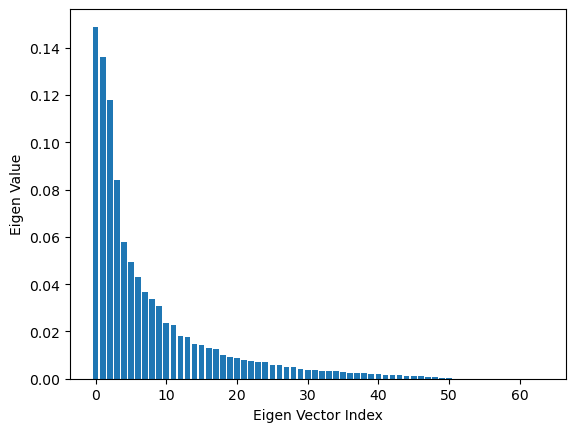

In [75]:
plt.bar(np.arange(64), eig_val/np.sum(eig_val))
plt.xlabel('Eigen Vector Index')
plt.ylabel('Eigen Value')
plt.show()

### Check for correctness

In [56]:
for i in range(len(eig_val)):
    eigv = eig_vec[:,i].reshape(1,64).T
    np.testing.assert_array_almost_equal(cov_mat.dot(eigv), eig_val[i] * eigv, decimal=6, err_msg='Not same', verbose=True)

## Top k Eigen vectors - With top k eigen values
##### Let k = 20

In [79]:
req_eig_vec = eig_vec[:, :20]
req_eig_val = eig_val[:20]

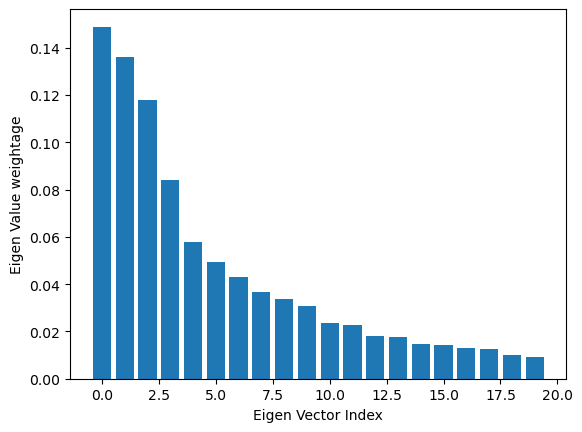

In [82]:
plt.bar(np.arange(20), req_eig_val/np.sum(eig_val))
plt.xlabel('Eigen Vector Index')
plt.ylabel('Eigen Value weightage')
plt.show()

## Transforming to new subspace

In [84]:
req_eig_vec.shape

(64, 20)

In [85]:
images.shape

(1797, 64)

In [88]:
new_image_space = images @ req_eig_vec
new_image_space.shape

(1797, 20)

## Model

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [90]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 10), random_state=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(new_image_space, labels, stratify=labels, random_state=2)

In [100]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10), random_state=1,
              solver='lbfgs')

In [101]:
## Checking how well the model fitted the data
clf.score(X_test, y_test)

0.9222222222222223